In [22]:
using Pkg
Pkg.activate("../..")
using Clapeyron, PyCall, LaTeXStrings
import PyPlot; const plt=PyPlot

  Activating project at `~/Library/CloudStorage/OneDrive-ImperialCollegeLondon/University/UROP/SAFT_codes/Clapeyron`


PyPlot

## Propane+decane

In [2]:
sys = ["propane","decane"]
model1 = GEPCSAFT(sys)
model2 = PCSAFT(sys)
model3 = UNIFAC(sys;puremodel=PCSAFT)

models = [model1,model2,model3];

In [7]:
T = [T1,T2,T3,T4]
xend1 = [1-1e-10,1-1e-10,1-1e-10]
xend2 = [1-1e-10,1-1e-10,1-1e-10]
xend3 = [0.942,0.937]
xend4 = [0.757,0.727]
xend = [xend1,xend2,xend3,xend4]


y = []
p = []

for k ∈ 1:4
    p1 = []
    y1 = []
    for i ∈ 1:2
        bub = []
        v0 =[]
        x = range(1e-10,xend[k][i],length=100)
        X = Clapeyron.Fractions.FractionVector.(x)
        for j ∈ 1:100
            if j==1
                append!(bub, [bubble_pressure(models[i],T[k],X[j])])
                v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
            else
                append!(bub, [bubble_pressure(models[i],T[k],X[j];v0=v0)])
                v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
            end
        end
        append!(y1,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
        append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
    end
    append!(y,[y1])
    append!(p,[p1])
end


for k ∈ 1:2
    p1 = []
    y1 = []
    for i ∈ 3
        bub = []
        v0 =[]
        x = range(1e-10,xend[k][i],length=100)
        X = Clapeyron.Fractions.FractionVector.(x)
        for j ∈ 1:100
                append!(bub, [bubble_pressure(models[i],T[k],X[j])])
        end
        append!(y1,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
        append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
    end
    append!(y,[y1])
    append!(p,[p1])
end
# for i ∈ 3
#     bub = []
#     v0 =[]
#     for j ∈ 1:100
#             append!(bub, [bubble_pressure(models[i],T,X[j])])
#     end
#     append!(y,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
#     append!(p,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
# end

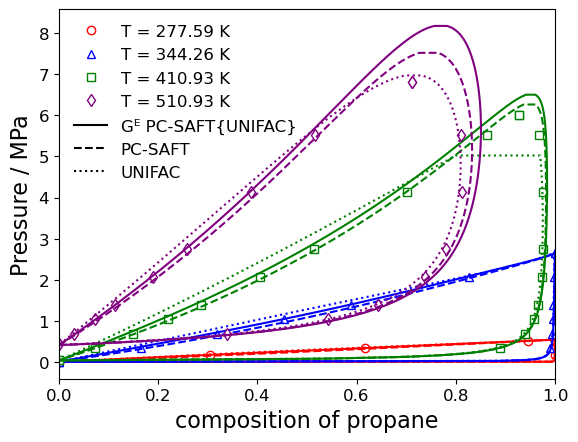

In [9]:
plt.clf()
plt.plot(y[1][1],p[1][1]./1e6,label="",linestyle="-",color="red")
plt.plot(y[1][2],p[1][2]./1e6,label="",linestyle="--",color="red")
plt.plot(y[5][1],p[5][1]./1e6,label="",linestyle=":",color="red")

plt.plot(y[2][1],p[2][1]./1e6,label="",linestyle="-",color="blue")
plt.plot(y[2][2],p[2][2]./1e6,label="",linestyle="--",color="blue")
plt.plot(y[6][1],p[6][1]./1e6,label="",linestyle=":",color="blue")

plt.plot(y[3][1],p[3][1]./1e6,label="",linestyle="-",color="green")
plt.plot(y[3][2],p[3][2]./1e6,label="",linestyle="--",color="green")

plt.plot(y[4][1],p[4][1]./1e6,label="",linestyle="-",color="purple")
plt.plot(y[4][2],p[4][2]./1e6,label="",linestyle="--",color="purple")

plt.plot([],[],label="Gᴱ PC-SAFT{UNIFAC}",linestyle="-",color="black")
plt.plot([],[],label="PC-SAFT",linestyle="--",color="black")
plt.plot([],[],label="UNIFAC",linestyle=":",color="black")

# plt.plot(y[3],p[3]./1e6,label="UNIFAC",linestyle="--")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("composition of propane",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.ylim([0,9])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("pxy_prop_dec.pdf")

## Benzene+propane

In [6]:
sys = ["propane","benzene"]
model1 = GEPCSAFT(sys)
model2 = PCSAFT(sys)
model3 = UNIFAC(sys;puremodel=PCSAFT)

models = [model1,model2,model3];

In [8]:
T = [T1,T2,T3,T4,T5,T6]
xend1 = [1-1e-10,1-1e-10,1-1e-10]
xend2 = [1-1e-10,1-1e-10,1-1e-10]
xend3 = [0.9,0.9]
xend4 = [0.87,0.85]
xend5 = [0.6,0.6]
xend6 = [0.59,0.58]
xend = [xend1,xend2,xend3,xend4,xend5,xend6]


y = []
p = []

for k ∈ 1:6
    p1 = []
    y1 = []
    for i ∈ 1:2
        bub = []
        v0 =[]
        x = range(1e-10,xend[k][i],length=100)
        X = Clapeyron.Fractions.FractionVector.(x)
        for j ∈ 1:100
            if j==1
                append!(bub, [bubble_pressure(models[i],T[k],X[j])])
                v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
            else
                append!(bub, [bubble_pressure(models[i],T[k],X[j];v0=v0)])
                v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
            end
        end
        append!(y1,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
        append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
    end
    append!(y,[y1])
    append!(p,[p1])
end


for k ∈ 1:2
    p1 = []
    y1 = []
    for i ∈ 3
        bub = []
        v0 =[]
        x = range(1e-10,xend[k][i],length=100)
        X = Clapeyron.Fractions.FractionVector.(x)
        for j ∈ 1:100
                append!(bub, [bubble_pressure(models[i],T[k],X[j])])
        end
        append!(y1,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
        append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
    end
    append!(y,[y1])
    append!(p,[p1])
end
# for i ∈ 3
#     bub = []
#     v0 =[]
#     for j ∈ 1:100
#             append!(bub, [bubble_pressure(models[i],T,X[j])])
#     end
#     append!(y,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
#     append!(p,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
# end

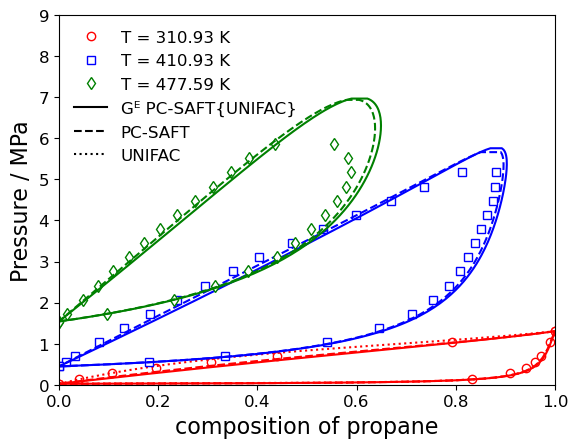

In [9]:
plt.clf()
plt.plot(y[1][1],p[1][1]./1e6,label="",linestyle="-",color="red")
plt.plot(y[1][2],p[1][2]./1e6,label="",linestyle="--",color="red")
plt.plot(y[7][1],p[7][1]./1e6,label="",linestyle=":",color="red")

plt.plot(y[4][1],p[4][1]./1e6,label="",linestyle="-",color="blue")
plt.plot(y[4][2],p[4][2]./1e6,label="",linestyle="--",color="blue")

plt.plot(y[6][1],p[6][1]./1e6,label="",linestyle="-",color="green")
plt.plot(y[6][2],p[6][2]./1e6,label="",linestyle="--",color="green")

plt.plot([],[],label="Gᴱ PC-SAFT{UNIFAC}",linestyle="-",color="black")
plt.plot([],[],label="PC-SAFT",linestyle="--",color="black")
plt.plot([],[],label="UNIFAC",linestyle=":",color="black")

# plt.plot(y[3],p[3]./1e6,label="UNIFAC",linestyle="--")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("composition of propane",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,9])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("pxy_prop_benz.pdf")

## Benzene+2-propanol

In [10]:
sys = ["benzene","2-propanol"]
model1 = GEPCSAFT(sys)
model2 = PCSAFT(sys)
model3 = UNIFAC(sys;puremodel=PCSAFT)

models = [model1,model2,model3];

In [12]:
T = [T1,T2,T3]


y = []
p = []

for k ∈ 1:3
    p1 = []
    y1 = []
    for i ∈ 1:3
        bub = []
        v0 =[]
        x = range(1e-10,1-1e-10,length=100)
        X = Clapeyron.Fractions.FractionVector.(x)
        if i!=3
            for j ∈ 1:100
                if j==1
                    append!(bub, [bubble_pressure(models[i],T[k],X[j])])
                    v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
                else
                    append!(bub, [bubble_pressure(models[i],T[k],X[j];v0=v0)])
                    v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
                end
            end
            append!(y1,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
            append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
        else
            for j ∈ 1:100
                append!(bub, [bubble_pressure(models[i],T[k],X[j])])
            end
            append!(y1,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
            append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
        end
    end
    append!(y,[y1])
    append!(p,[p1])
end

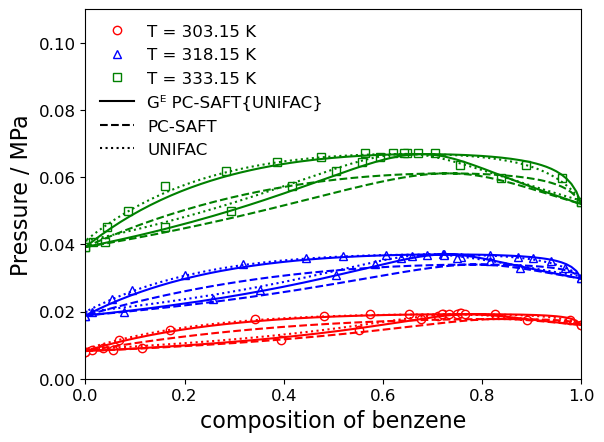

In [13]:
plt.clf()
plt.plot(y[1][1],p[1][1]./1e6,label="",linestyle="-",color="red")
plt.plot(y[1][2],p[1][2]./1e6,label="",linestyle="--",color="red")
plt.plot(y[1][3],p[1][3]./1e6,label="",linestyle=":",color="red")

plt.plot(y[2][1],p[2][1]./1e6,label="",linestyle="-",color="blue")
plt.plot(y[2][2],p[2][2]./1e6,label="",linestyle="--",color="blue")
plt.plot(y[2][3],p[2][3]./1e6,label="",linestyle=":",color="blue")

plt.plot(y[3][1],p[3][1]./1e6,label="",linestyle="-",color="green")
plt.plot(y[3][2],p[3][2]./1e6,label="",linestyle="--",color="green")
plt.plot(y[3][3],p[3][3]./1e6,label="",linestyle=":",color="green")

plt.plot([],[],label="Gᴱ PC-SAFT{UNIFAC}",linestyle="-",color="black")
plt.plot([],[],label="PC-SAFT",linestyle="--",color="black")
plt.plot([],[],label="UNIFAC",linestyle=":",color="black")

# plt.plot(y[3],p[3]./1e6,label="UNIFAC",linestyle="--")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("composition of benzene",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,0.11])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("pxy_Benz_2PropOH.pdf")

## Hexane+methanol

In [14]:
model1 = GEPCSAFT(["methanol","hexane"];activity=NRTL)
model2 = PCSAFT(["methanol","hexane"])
model3 = PSRK(["methanol","hexane"];puremodel=PCSAFT)

models = [model1,model2,model3];

In [16]:
p=1.013e5

x=range(1e-5,1-1e-5,length=100)
X = Clapeyron.Fractions.FractionVector.(x)

y = []
T = []
for i ∈ 1:2
    bub = []
    v0 = [341.8523023888702, log10(0.0001413174518511577), log10(0.027040696104010605),0.001,0.999]
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];v0=v0)])
            v0 = [bub[j][1],log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

for i ∈ 3
    bub = []
    v0 = []
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];T0=335)])
    end
    append!(y,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

In [17]:
N=400
x2 = range(0.05,0.253,length=N)
X2 = Clapeyron.Fractions.FractionVector.(x2)

xx = []
T2 = []
lle = []

for i ∈ 1:1
    v0 = [289.06401114502336, log10(0.0001266723503732177), log10(8.124586169994976e-5), 0.5526971788543216, 0.44730282114567843]
    for j ∈ 1:N
        append!(lle, [LLE_temperature(models[i],p,X2[j];v0=v0)])
        v0 = [lle[j][1],log10(lle[j][2]),log10(lle[j][3]),lle[j][4][1],lle[j][4][2]]
    end
    append!(xx,[append!([lle[i][4][1] for i ∈ 1:N],reverse(x2))])
    append!(T2,[append!([lle[i][1] for i ∈ 1:N],[lle[i][1] for i ∈ N:-1:1])])
end

T3 = range(290,313,length=N)
T4 = []
for i ∈ 3
    lle = []
    v0 = []
    for j ∈ 1:N
        if j==1
            append!(lle, [LLE(models[i],T3[j])])
            v0 = [lle[j][1][1],lle[j][2][1]]
        else
            append!(lle, [LLE(models[i],T3[j];v0=v0)])
            v0 = [lle[j][1][1],lle[j][2][1]]
        end
    end
    append!(xx,[append!([lle[i][1][1] for i ∈ 1:N],[lle[i][2][1] for i ∈ N:-1:1])])
    append!(T4,[append!([T3[i] for i ∈ 1:N],[T3[i] for i ∈ N:-1:1])])

end

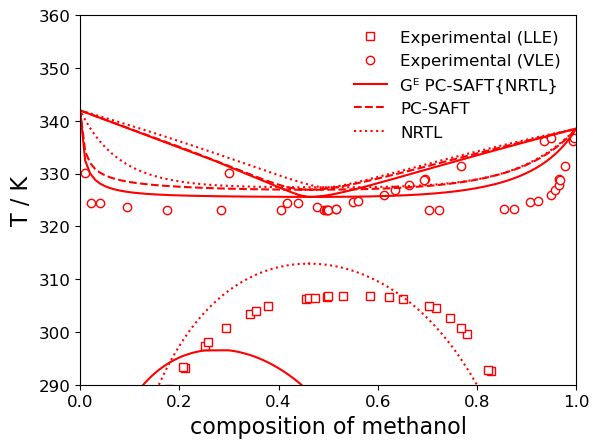

In [18]:
plt.clf()
plt.plot(y[1],T[1],label="Gᴱ PC-SAFT{NRTL}",linestyle="-",color="red")
plt.plot(y[2],T[2],label="PC-SAFT",linestyle="--",color="red")
plt.plot(y[3],T[3],label="NRTL",linestyle=":",color="red")

plt.plot(xx[1],T2[1],label="",linestyle="-",color="red")
plt.plot(xx[2],T4[1],label="",linestyle=":",color="red")

plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("T / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([290,360])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("Txy_hex_meoh.pdf")

## Water+ethanol

In [88]:
model1 = GEPCSAFT(["ethanol","water"];activity=COSMOSACdsp)
model2 = PCSAFT(["ethanol","water"])
model3 = COSMOSACdsp(["ethanol","water"];puremodel=PCSAFT)

models = [model1,model2,model3];

In [91]:
p=1.013e5

x=range(1e-5,1-1e-5,length=100)
X = Clapeyron.Fractions.FractionVector.(x)

y = []
T = []
for i ∈ 1:2
    bub = []
    v0 = [373.18049481630885, log10(2.051092808220833e-5), log10(0.03015608493442993),0.001,0.999]
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];v0=v0)])
            v0 = [bub[j][1],log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

for i ∈ 3
    bub = []
    v0 = []
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];T0=335)])
    end
    append!(y,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

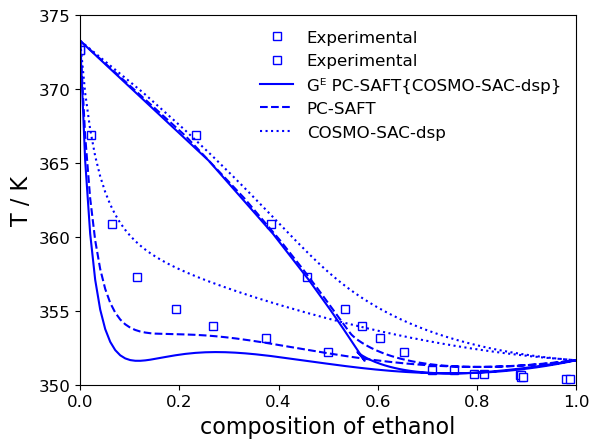

In [95]:
plt.clf()
plt.plot(y[1],T[1],label="Gᴱ PC-SAFT{COSMO-SAC-dsp}",linestyle="-",color="blue")
plt.plot(y[2],T[2],label="PC-SAFT",linestyle="--",color="blue")
plt.plot(y[3],T[3],label="COSMO-SAC-dsp",linestyle=":",color="blue")

# plt.plot(xx[1],T2[1],label="",linestyle="-",color="red")
# plt.plot(xx[2],T4[1],label="",linestyle=":",color="red")

plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("composition of ethanol",fontsize=16)
plt.ylabel("T / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([350,375])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("Txy_Assoc_EtOH.pdf")

## Acetonitrile+water

In [14]:
model1 = GEPCSAFT(["acetonitrile","water"];activity=Wilson)
model2 = PCSAFT(["acetonitrile","water"])
model3 = Wilson(["acetonitrile","water"];puremodel=PCSAFT)

models = [model1,model2,model3];

In [16]:
p=1.013e5

x=range(1e-5,1-1e-5,length=100)
X = Clapeyron.Fractions.FractionVector.(x)

y = []
T = []
for i ∈ 1:2
    bub = []
    v0 = [374.71636596256286, log10(2.0524576235486944e-5), log10(0.030178487325251392),0.001,0.999]
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];v0=v0)])
            v0 = [bub[j][1],log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

for i ∈ 3
    bub = []
    v0 = []
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];T0=335)])
    end
    append!(y,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

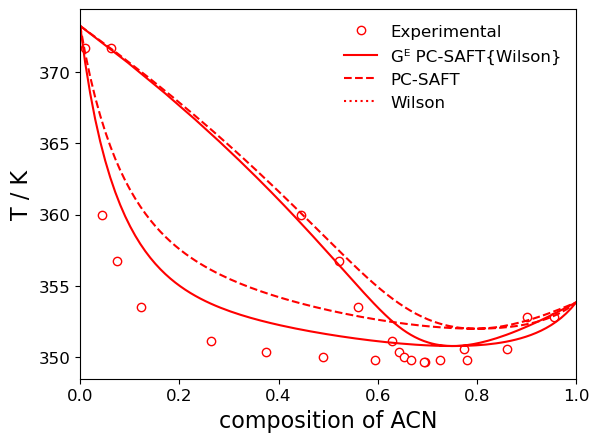

In [18]:
plt.clf()
plt.plot(y[1],T[1],label="Gᴱ PC-SAFT{Wilson}",linestyle="-",color="red")
plt.plot(y[2],T[2],label="PC-SAFT",linestyle="--",color="red")
plt.plot(y[3],T[3],label="Wilson",linestyle=":",color="red")

# plt.plot(xx[1],T2[1],label="",linestyle="-",color="red")
# plt.plot(xx[2],T4[1],label="",linestyle=":",color="red")

plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("composition of ACN",fontsize=16)
plt.ylabel("T / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.ylim([290,360])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("Txy_Assoc_ACN.pdf")

## 1-propanol+benzene

In [19]:
model1 = GEPCSAFT(["1-propanol","benzene"])
model2 = PCSAFT(["1-propanol","benzene"])
model3 = UNIFAC(["1-propanol","benzene"])
models = [model1,model2,model3];
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
H_E = []
for i ∈ 1:3
    append!(H_E,[mixing.(models[i],1e5,313.15,X,enthalpy)])
end

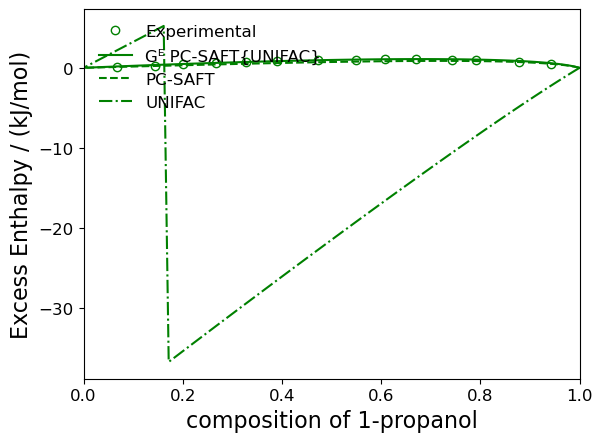

In [21]:
plt.clf()
plt.plot(1 .-x,H_E[1]./1e3,label="Gᴱ PC-SAFT{UNIFAC}",color="green",linestyle="-")
plt.plot(1 .-x,H_E[2]./1e3,label="PC-SAFT",color="green",linestyle="--")
plt.plot(1 .-x,H_E[3]./1e3,label="UNIFAC",color="green",linestyle="-.")

plt.xlabel("composition of 1-propanol",fontsize=16)
plt.ylabel("Excess Enthalpy / (kJ/mol)",fontsize=16)
# plt.ylim([0.,0.6])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=false,fontsize=12,loc="upper left") 
display(plt.gcf())
# plt.savefig("1propanol_benzene_HE.pdf")

# Cyclohexane+decane

In [78]:
model1 = GEPCSAFT(["cyclohexane","decane"])
model2 = PCSAFT(["cyclohexane","decane"])
model3 = UNIFAC(["cyclohexane","decane"])
models = [model1,model2,model3];
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
H_E = []
for i ∈ 1:3
    append!(H_E,[mixing.(models[i],1e5,298.15,X,enthalpy)])
end

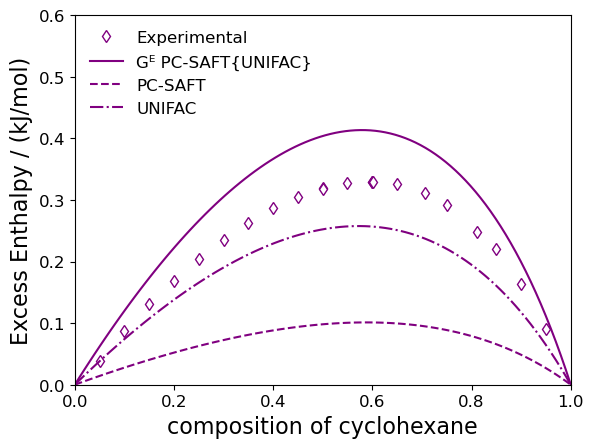

In [80]:
plt.clf()
plt.plot(x,H_E[1]./1e3,label="Gᴱ PC-SAFT{UNIFAC}",color="purple",linestyle="-")
plt.plot(x,H_E[2]./1e3,label="PC-SAFT",color="purple",linestyle="--")
plt.plot(x,H_E[3]./1e3,label="UNIFAC",color="purple",linestyle="-.")

plt.xlabel("composition of cyclohexane",fontsize=16)
plt.ylabel("Excess Enthalpy / (kJ/mol)",fontsize=16)
plt.ylim([0.,0.6])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=false,fontsize=12,loc="upper left") 
display(plt.gcf())
plt.savefig("cyclohexane_decane_HE.pdf")

# 2-propanol + benzene

In [27]:
model1 = GEPCSAFT(["2-propanol","benzene"])
model2 = PCSAFT(["2-propanol","benzene"])
# model3 = UNIFAC(["1-propanol","benzene"])
models = [model1,model2,model3];
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
V_E = []
for i ∈ 1:2
    append!(V_E,[mixing.(models[i],1e5,303.15,X,volume)])
end

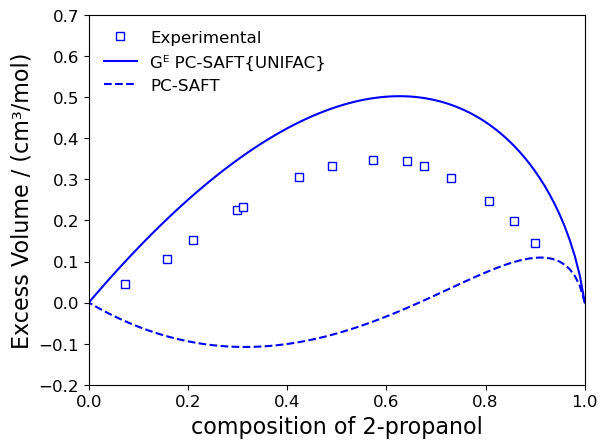

In [29]:
plt.clf()
plt.plot(1 .-x,V_E[1]./1e-6,label="Gᴱ PC-SAFT{UNIFAC}",color="blue",linestyle="-")
plt.plot(1 .-x,V_E[2]./1e-6,label="PC-SAFT",color="blue",linestyle="--")

plt.xlabel("composition of 2-propanol",fontsize=16)
plt.ylabel("Excess Volume / (cm³/mol)",fontsize=16)
plt.ylim([-0.2,0.7])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=false,fontsize=12,loc="upper left")
display(plt.gcf())
plt.savefig("2propanol_benzene_VE.pdf",bbox_inches="tight")

# Decane+hexadecane

In [23]:
model1 = GEPCSAFT(["decane","hexadecane"])
model2 = PCSAFT(["decane","hexadecane"])
model3 = UNIFAC(["decane","hexadecane"];puremodel=PCSAFT)
models = [model1,model2,model3];

x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
V_E = []
for i ∈ 1:2
    append!(V_E,[mixing.(models[i],1e5,298.15,X,volume)])
end

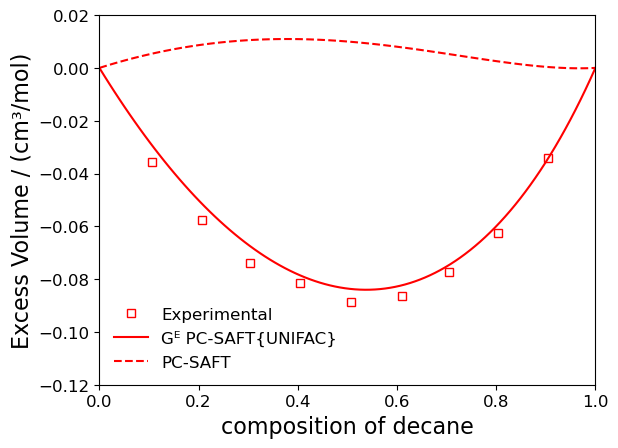

In [26]:
plt.clf()
plt.plot(x,V_E[1]./1e-6,label="Gᴱ PC-SAFT{UNIFAC}",color="red",linestyle="-")
plt.plot(x,V_E[2]./1e-6,label="PC-SAFT",color="red",linestyle="--")

plt.xlabel("composition of decane",fontsize=16)
plt.ylabel("Excess Volume / (cm³/mol)",fontsize=16)
plt.ylim([-0.12,0.02])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=false,fontsize=12,loc="lower left")
display(plt.gcf())
plt.savefig("hexadec_decane_VE.pdf",bbox_inches="tight")